In [34]:
%matplotlib inline
from matplotlib.pyplot import plot, subplot, subplots, show, imshow, axis, xticks, grid, title, scatter
from numpy import pi, linspace, array, matrix, cos, sin
import urllib, cStringIO
import Image

# Representing Lines in Cartesian and Hough Space

* Cartesian:   $y = ax+b$
* Hough Space: $\rho = x\cos(\theta)+y\sin(\theta)$


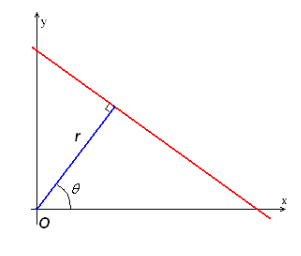

In [35]:
file = cStringIO.StringIO(urllib.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/e6/R_theta_line.GIF').read())
img = Image.open(file)
imshow(img); axis('off');

Fixing a point in space $(x,y)$, we can look at $\rho$ as a function of $\theta$. Hence, representing that point int polar coordinates $(A,\phi)$, we have:

$
\begin{align*} 
\rho &= x\cos(\theta)+y\sin(\theta) \\ 
\rho &= A\cos(\phi)\cos(\theta)+A\sin(\phi)\sin(\theta) \\
\rho &= A\cos(\theta-\phi)
\end{align*}
$

** In conclusion, a point in *Cartesian Space* represents a sinusoid in *Hough Space*. **

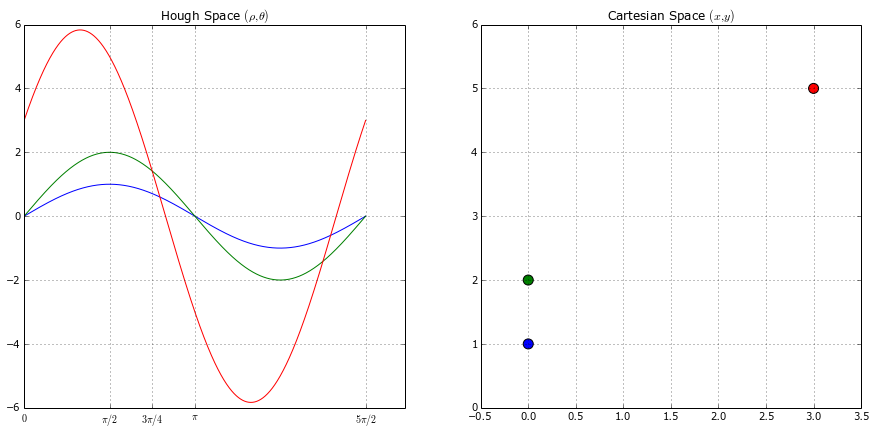

In [36]:
# Theta vector
theta = linspace(0,2*pi,1000)

# Points to be calculated
points = array([[0,1],[0,2],[3,5]])
# Hough Line Transform Matrix
H = matrix([cos(theta),sin(theta)])

# Apply Transform
rs = points*H

# Plots
colors = ['b','g','r','c','m','y','k','w'];
subplots(1,2,figsize=(15,6.8687));

subplot(1,2,1); plot(theta,rs.transpose()); xticks([0, pi/2, 3*pi/4, pi, 2*pi],['$0$', r'$\pi/2$', r'$3\pi/4$', r'$\pi$', r'$5\pi/2$']); grid(True)
title(r"Hough Space $(\rho,\theta)$");

subplot(1,2,2); scatter(*zip(*points), c=colors, s=100); title(r"Cartesian Space $(x,y)$"); grid(True)

# Analysis of Hough Space

Some interesting properties of the Hough Space are listed below:
* $\rho(0) = x$
* $\rho(\pi/2) = y$

We have seen that, each point in cartesian space is mapped to a sinusoid in Hough space. But, how do point in Hough space map into cartesian space?

$
\begin{align*} 
\rho &= x\cos(\theta)+y\sin(\theta) \\ 
y & = -\left (\frac{\cos(\theta)}{\sin(\theta)}\right )x - \frac{\rho}{\sin(\theta)} \\\
\end{align*}
$

Since $\theta$ and $\rho$ are fixed, we conclude that ** points in Hough space map to lines in cartesian space .**